In [1]:
import warnings
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = "NanumGothicCoding"
import seaborn as sns
%matplotlib notebook

In [2]:
anscombe = sns.load_dataset('anscombe')
# anscombe

matplotlib 사용하기

In [3]:
# seaborn 라이브러리의 tips 데이터 집합은 어떤 식당에서 팁을 지불한 손님들의 정보를 모아둔 것이다.
# tips 데이터 집합은 지불금액, 팁, 성별, 흡연여부, 요일, 전체인원 정보를 담고 있다.
tips = sns.load_dataset("tips")
print(type(tips))
print(tips.head())

<class 'pandas.core.frame.DataFrame'>
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<IPython.core.display.Javascript object>


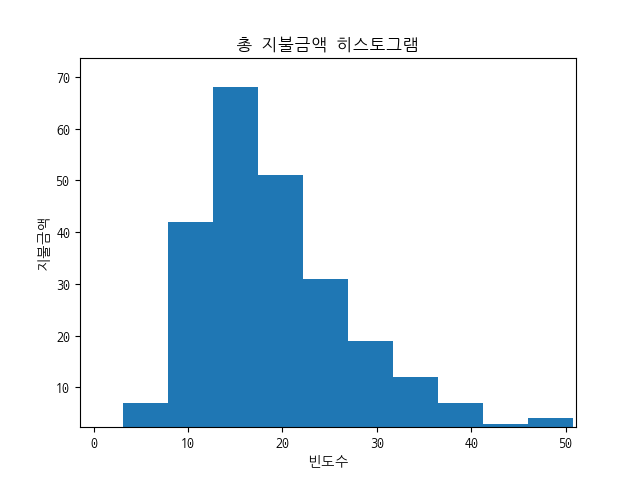

Text(0, 0.5, '지불금액')

In [4]:
# 히스토그램은 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 사용하는 그래프이다.
fig = plt.figure() # 그래프가 위치할 기본 틀을 만든다.
axes1 = fig.add_subplot(1, 1, 1) # 그래프 격자를 그린다.
axes1.hist(tips["total_bill"]) # hist() 메소드로 히스토그램을 만들수 있다.
axes1.set_title("총 지불금액 히스토그램") # 그래프 제목을 넣는다.
axes1.set_xlabel("빈도수") # x축 제목을 넣는다.
axes1.set_ylabel("지불금액") # y축 제목을 넣는다.

<IPython.core.display.Javascript object>


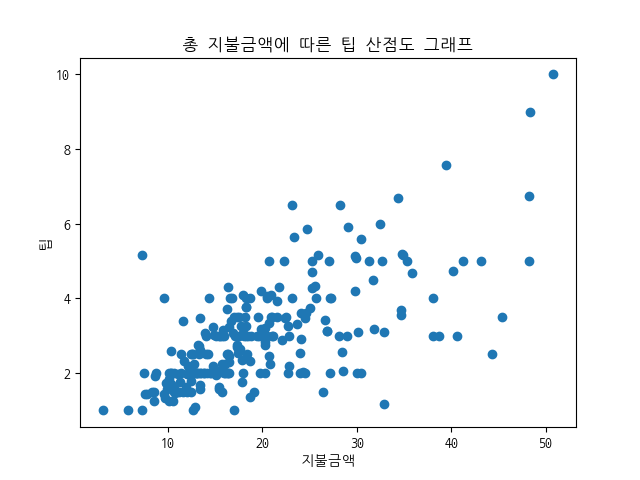

Text(0, 0.5, '팁')

In [5]:
# 산점도 그래프는 변수 2개를 사용해서 만드는 그래프이며 변수 2개를 사용하기 때문에 통계 용어로 이변량 그래프라 부른다.
# total_bill 열에 따른 tip 열의 분포를 나타내는 산점도 그래프
# 기본 틀과 그래프 격자를 만들고 scatter() 메소드에 total_bill, tip 열을 전달하면 산점도 그래프가 만들어진다.
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips["total_bill"], tips["tip"])
axes1.set_title("총 지불금액에 따른 팁 산점도 그래프")
axes1.set_xlabel("지불금액")
axes1.set_ylabel("팁")

<IPython.core.display.Javascript object>


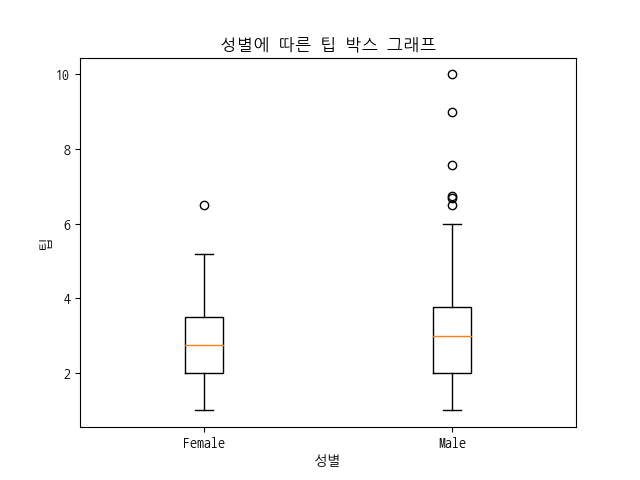

Text(0, 0.5, '팁')

In [6]:
# 박스 그래프는 이산형 변수와 연속형 변수를 함께 사용하는 그래프이다.
# 이산형 변수란 Female, Male과 같이 명확하게 구분되는 값을 의미하고 연속형 변수란 tip과 같이 명확하게 셀 수 없는 범위의 값을 
# 의미한다.
# boxplot() 메소드를 사용하면 박스 그래프를 그릴 수 있다.
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1, 1, 1)

# 박스 그래프에 작성에 사용할 데이터는 리스트 형태로 넣어준다.
axes1.boxplot(
    [tips[tips["sex"] == "Female"]["tip"], tips[tips["sex"] == "Male"]["tip"]], 
    labels = ["Female", "Male"]
)

axes1.set_title("성별에 따른 팁 박스 그래프")
axes1.set_xlabel("성별")
axes1.set_ylabel("팁")

In [7]:
# 3개 이상의 변수를 사용하는 그래프를 다변량 그래프라 부른다.
# 산점도 그래프에 성별을 새 변수로 추가하고 색상으로 구분하면 적절할 것이다. Female, Male과 같은 문자열은 산점도 그래프의 
# 색상을 지정하는 값으로 사용할 수 없기 때문에 0, 1과 같은 정수를 사용해야 한다.
# 여성(Female)인 경우 0을 반환하고 남성(Male)인 경우 1을 반환하는 함수를 만든다.
def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1

In [8]:
# record_sex() 함수가 반환하는 값을 데이터프레임에 추가한다.
# apply() 메소드를 사용해 sex열에 record_sex() 함수를 브로드캐스팅 한다.
# tips["sex"].apply(record_sex)의미는 tips 데이터프레임의 sex 열의 데이터를 record_sex() 함수로 전달해서 일괄적으로 함수를 
# 실행한다.
tips["sex_color"] = tips["sex"].apply(record_sex)
print(tips.head())

   total_bill   tip     sex smoker  day    time  size sex_color
0       16.99  1.01  Female     No  Sun  Dinner     2         0
1       10.34  1.66    Male     No  Sun  Dinner     3         1
2       21.01  3.50    Male     No  Sun  Dinner     3         1
3       23.68  3.31    Male     No  Sun  Dinner     2         1
4       24.59  3.61  Female     No  Sun  Dinner     4         0


<IPython.core.display.Javascript object>


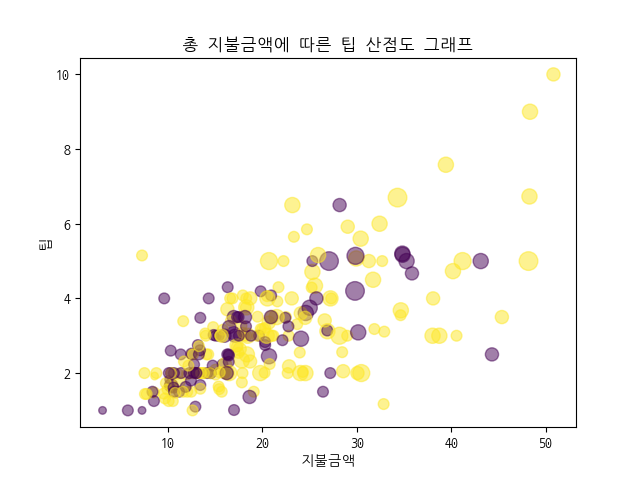

Text(0, 0.5, '팁')

In [9]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1, 1, 1)

axes1.scatter(
    x = tips["total_bill"], # 산점도 그래프의 x축으로 사용할 데이터
    y = tips["tip"],        # 산점도 그래프의 y축으로 사용할 데이터
    c = tips["sex_color"],  # Female, Male에 따른 데이터를 구별하는 색상
    s = tips["size"] * 30,  # 산점도 점의 크기
    alpha = 0.5             # 선점도 점의 투명도
)

axes1.set_title("총 지불금액에 따른 팁 산점도 그래프")
axes1.set_xlabel("지불금액")
axes1.set_ylabel("팁")

seaborn 사용하기  
seaborn 라이브러리를 사용하면 matplotlib 보다 좀 더 화려한 그래프를 그릴 수 있다.

In [10]:
tips = sns.load_dataset("tips")
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


<IPython.core.display.Javascript object>


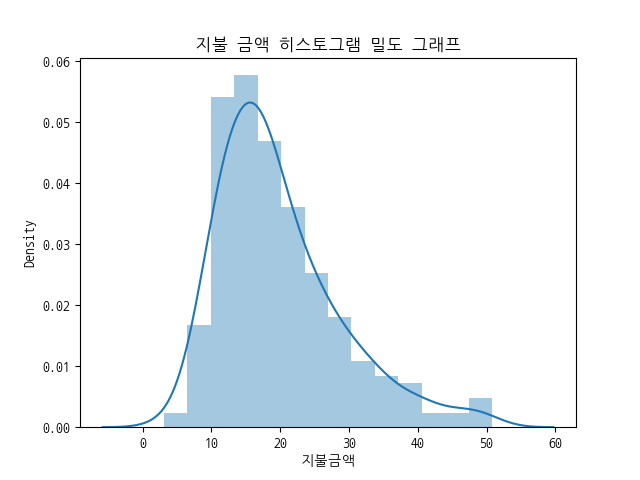

Text(0.5, 0, '지불금액')

In [11]:
# seaborn 라이브러리로 히스토그램을 그리려면 subplots(), distplot() 메소드를 사용한다.
# 먼저 subplots() 메소드를 사용해 그래프의 기본 틀을 만들고 distplot() 메소드에 데이터를 전달하면 히스토그램을 그릴 수 있다.
ax = plt.subplots()
ax = sns.distplot(tips["total_bill"])
ax.set_title("지불 금액 히스토그램 밀도 그래프")
ax.set_xlabel("지불금액")

<IPython.core.display.Javascript object>


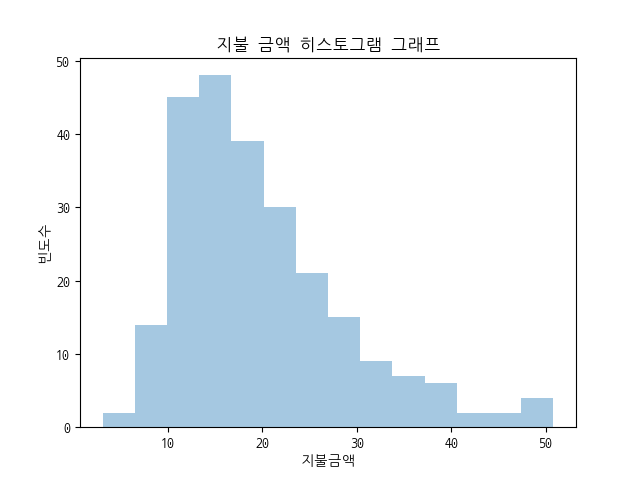

Text(0, 0.5, '빈도수')

In [12]:
# distplot() 메소드를 사용하면 히스토그램과 밀집도 그래프를 같이 그려준다.
# 밀집도 그래프는 주어진 데이터를 정규화시켜 넓이가 1이 되도록 그린 그래프를 말하며 밀집도 그래프를 제외하고 싶다면 distplot() 
# 메소드의 kde 속성을 False로 설정하면 된다.
ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], kde = False)
ax.set_title("지불 금액 히스토그램 그래프")
ax.set_xlabel("지불금액")
ax.set_ylabel("빈도수")

<IPython.core.display.Javascript object>


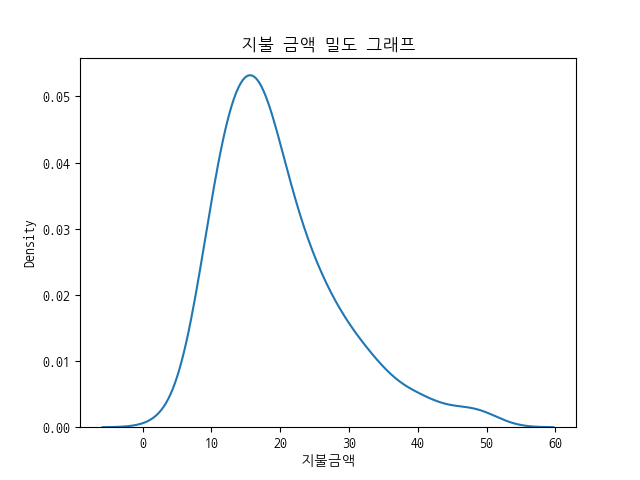

Text(0.5, 0, '지불금액')

In [13]:
# 밀집도 그래프만 나타내려면 distplot() 메소드의 hist 속성을 False로 지정하면 된다.
ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], hist = False)
ax.set_title("지불 금액 밀도 그래프")
ax.set_xlabel("지불금액")

<IPython.core.display.Javascript object>


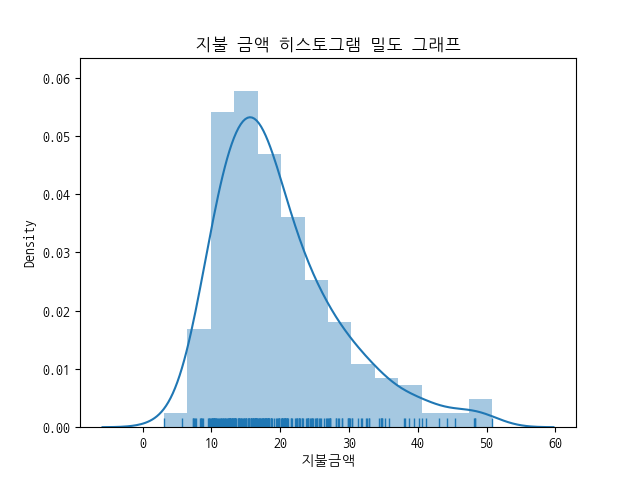

Text(0.5, 0, '지불금액')

In [14]:
# distplot() 메소드의 rug 속성에 True를 지정하면 그래프의 축에 동일한 길이의 직선을 붙여 데이터 밀집 정도를 표현한 양탄자 
# 그래프를 추가로 나타낼 수 있다.
ax = plt.subplots()
ax = sns.distplot(tips["total_bill"], rug = True)
ax.set_title("지불 금액 히스토그램 밀도 그래프")
ax.set_xlabel("지불금액")

<IPython.core.display.Javascript object>


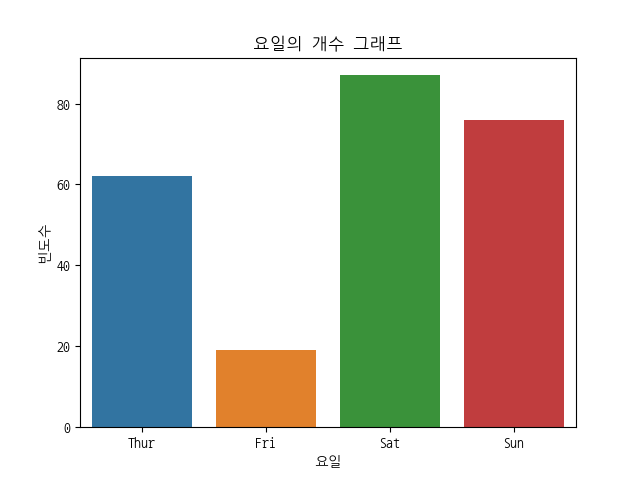

Text(0, 0.5, '빈도수')

In [15]:
# 히스토그램과 비슷하게 생긴 count 그래프는 이산값을 나타내는 그래프로 countplot() 메소드에 tips 데이터프레임의 day 열의 
# 데이터를 넣어 count 그래프를 그린다.
ax = plt.subplots()
ax = sns.countplot(tips["day"]) # ax = sns.countplot("day", data = tips)
ax.set_title("요일의 개수 그래프")
ax.set_xlabel("요일")
ax.set_ylabel("빈도수")

<IPython.core.display.Javascript object>


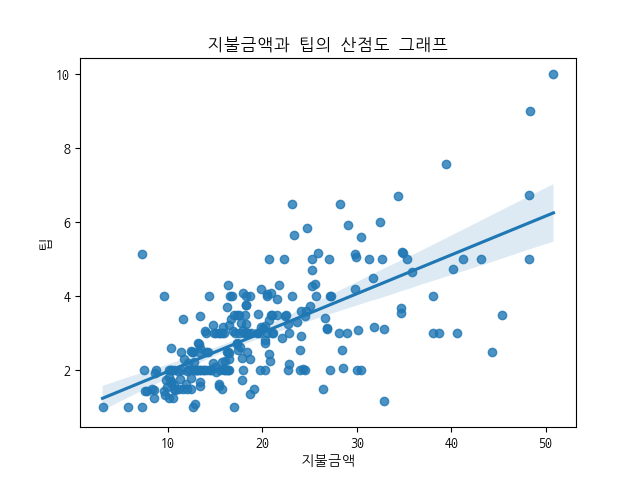

Text(0, 0.5, '팁')

In [16]:
# seaborn 라이브러리는 matplotlib 라이브러리보다 다양한 방법으로 산점도 그래프를 그릴 수 있다.
# 산점도 그래프를 그리려면 seaborn 라이브러리의 regplot() 메소드를 사용한다.
# regplot() 메소드를 시용하면 산점도 그래프와 회귀선을 함께 그릴 수 있다.
ax = plt.subplots()
ax = sns.regplot(tips["total_bill"], tips["tip"])
# ax = sns.regplot(x = "total_bill", y = "tip", data = tips)
ax.set_title("지불금액과 팁의 산점도 그래프")
ax.set_xlabel("지불금액")
ax.set_ylabel("팁")

<IPython.core.display.Javascript object>


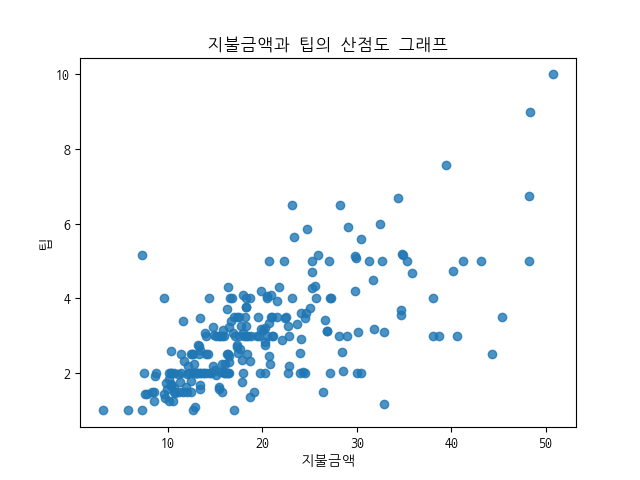

Text(0, 0.5, '팁')

In [17]:
ax = plt.subplots()
# 만약 산점도 그래프에서 회귀선을 제거하려면 fit_reg 속성을 False로 지정하면 된다.
ax = sns.regplot(tips["total_bill"], tips["tip"], fit_reg = False)
# ax = sns.regplot(x = "total_bill", y = "tip", data = tips, fit_reg = False)
ax.set_title("지불금액과 팁의 산점도 그래프")
ax.set_xlabel("지불금액")
ax.set_ylabel("팁")

<IPython.core.display.Javascript object>


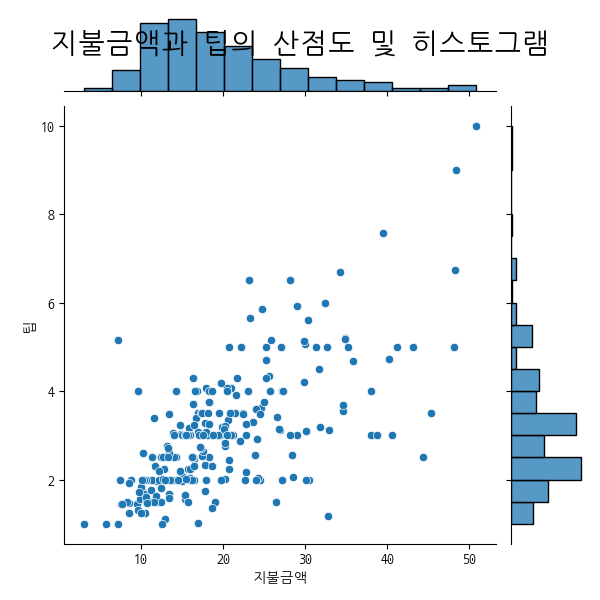

In [18]:
# 산점도 그래프와 히스토그램을 한 번에 그리려면 jointplot() 메소드를 사용해서 x, y 속성에 그래프로 표시하려는 열 이름을 
# 지정하고 data 속성에 그래프로 표시할 데이터가 저장된 데이터프레임을 지정하면 된다.
joint = sns.jointplot(x = "total_bill", y = "tip", data = tips)
# fig.suptitle() 메소드로 그래프의 제목을 설정할 수 있고 fontsize 속성으로 글꼴 크기를 y 속성으로 제목이 표시될 위치를 지정할 
# 수 있다.
joint.fig.suptitle("지불금액과 팁의 산점도 및 히스토그램", fontsize = 20, y = 0.95)
# set_axis_labels() 메소드로 x, y 축의 레이블을 설정할 수 있다.
joint.set_axis_labels(xlabel = "지불금액", ylabel = "팁")

<IPython.core.display.Javascript object>


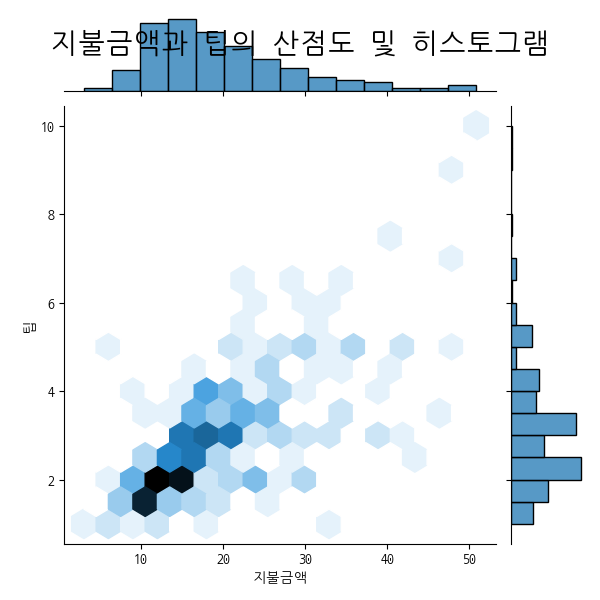

In [19]:
# 산점도는 점이 겹쳐 보일 경우 점을 구분하기 어렵다는 단점이 있다. 만약 산점도 그래프의 데이터를 구분하기 쉽게 그리고 싶다면 
# 육각 그래프를 사용하면 된다.
# 육각 그래프는 2차원 표면에 육각형으로 데이터를 쌓아 표현하는 그래프로 jointplot() 메소드를 사용해 그리며 kind 옵션을 hex로 
# 지정하면 된다.
joint = sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "hex")
joint.fig.suptitle("지불금액과 팁의 산점도 및 히스토그램", fontsize = 20, y = 0.95)
joint.set_axis_labels(xlabel = "지불금액", ylabel = "팁")

<IPython.core.display.Javascript object>


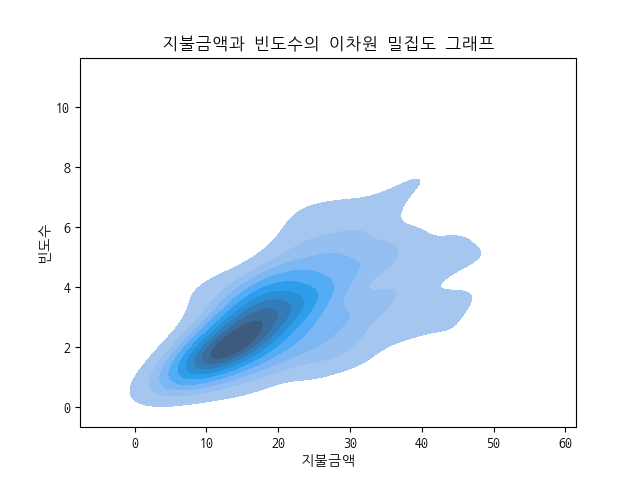

Text(0, 0.5, '빈도수')

In [20]:
# 이차원 밀집도는 kdeplot() 메소드로 만들 수 있다.
# total_bill, tip 열 데이터로 이차원 밀집도 그래프를 그린다. data 속성과 data2 속성에 차트를 구성할 데이터를 지정해야 한다.
# kdeplot() 메소드의 shade 속성을 True로 설정하면 그래프에 음영 효과를 줄 수 있다.
ax = plt.subplots()
ax = sns.kdeplot(data = tips["total_bill"], data2 = tips["tip"], shade = True)
ax.set_title("지불금액과 빈도수의 이차원 밀집도 그래프")
ax.set_xlabel("지불금액")
ax.set_ylabel("빈도수")

<IPython.core.display.Javascript object>


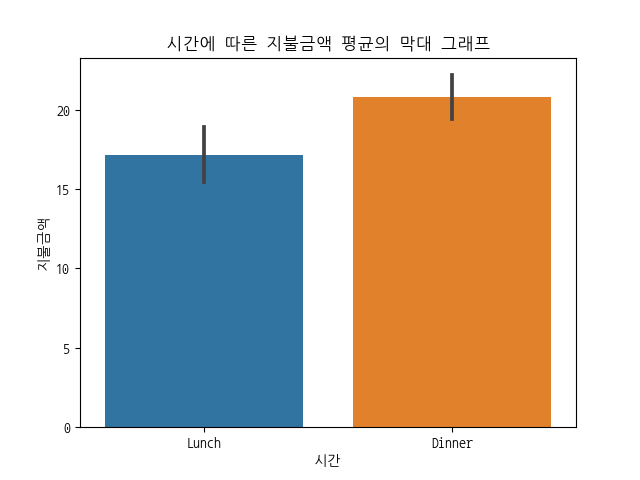

Text(0, 0.5, '지불금액')

In [21]:
# bar 그래프는 batplot() 메소드로 만들 수 있다.
# bar 그래프는 지정한 데이터의 평균을 계산해서 작성된다.
ax = plt.subplots()
ax = sns.barplot(x = "time", y = "total_bill", data = tips)
ax.set_title("시간에 따른 지불금액 평균의 막대 그래프")
ax.set_xlabel("시간")
ax.set_ylabel("지불금액")

<IPython.core.display.Javascript object>


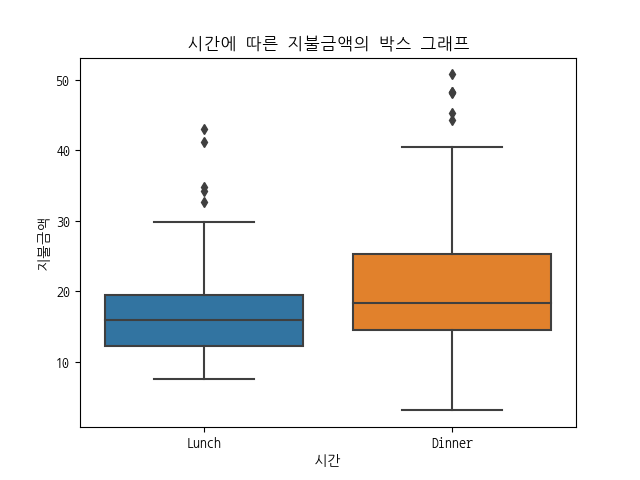

Text(0, 0.5, '지불금액')

In [22]:
# 박스 그래프는 boxplot() 메소드로 만들 수 있다.
# 박스 그래프는 지정한 데이터의 최소값, 1분위수, 중간값, 3분위수, 최대값, 이상치 등 다양한 통계량을 한 번에 표현한다.
ax = plt.subplots()
ax = sns.boxplot(x = "time", y = "total_bill", data = tips)
ax.set_title("시간에 따른 지불금액의 박스 그래프")
ax.set_xlabel("시간")
ax.set_ylabel("지불금액")

<IPython.core.display.Javascript object>


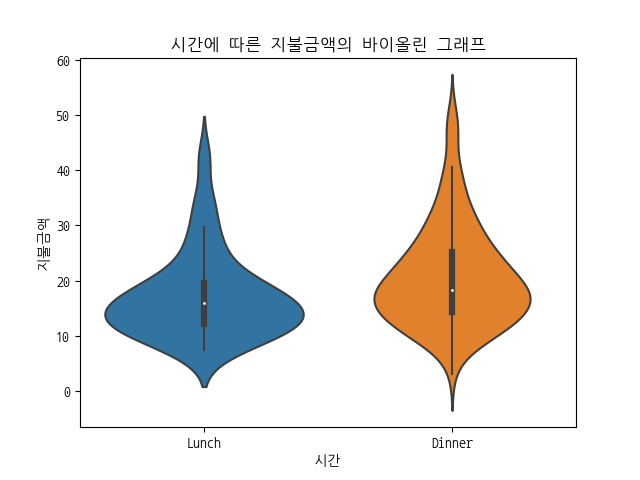

Text(0, 0.5, '지불금액')

In [23]:
# 박스 그래프는 다양한 통계 수치를 확인하기 위해 자주 사용하는 그래프지만 데이터 분산이 모호하게 표현된다.
# 이런 경우 박스 그래프에 커널 밀도를 추정한 바이올린 그래프를 사용하면 된다. 바이올린 그래프는 violinplot() 메소드를 사용해서
# 그릴 수 있다.
ax = plt.subplots()
ax = sns.violinplot(x = "time", y = "total_bill", data = tips)
ax.set_title("시간에 따른 지불금액의 바이올린 그래프")
ax.set_xlabel("시간")
ax.set_ylabel("지불금액")

<IPython.core.display.Javascript object>


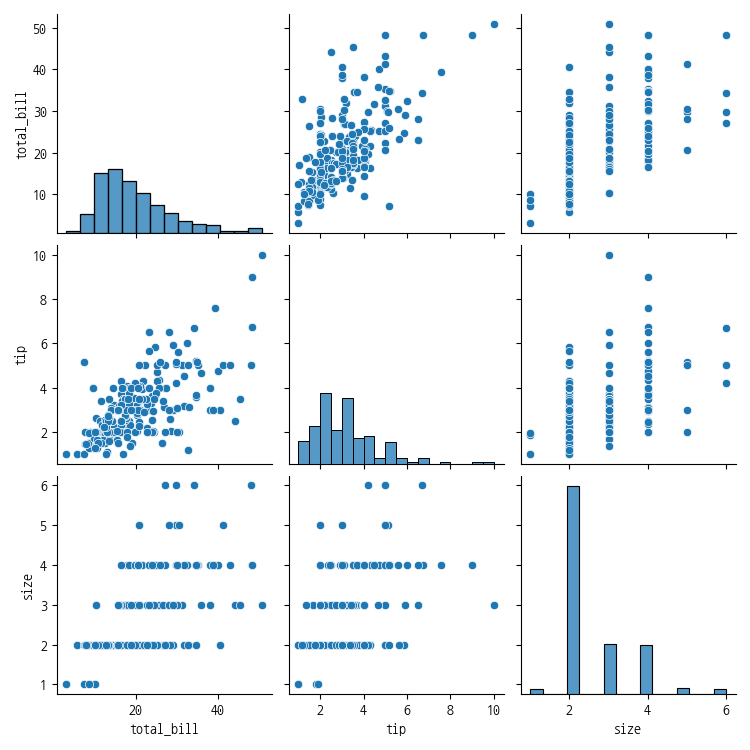

In [24]:
# 관계 그래프는 지금까지 그려본 그래프를 종합한 그래프라고 생각하면 된다.
# 관계 그래프는 pairplot() 메소드에 데이터프레임을 넣어주는 방법으로 간단하게 그릴 수 있다.
sns.pairplot(tips)

<IPython.core.display.Javascript object>


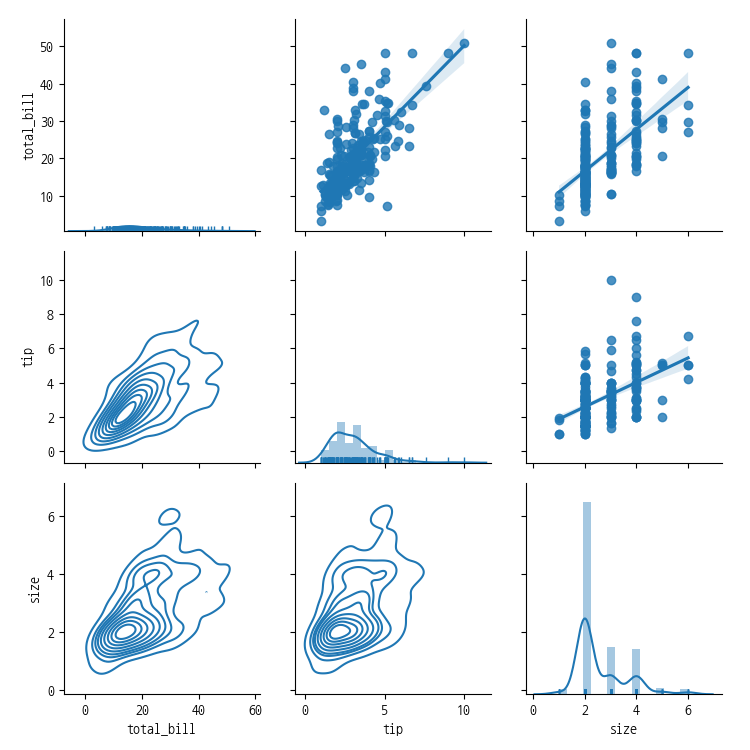

In [25]:
# 관계 그래프는 중복된 정보가 표현된다는 단점이 있다. 즉, 관계 그래프의 좌측 상단에서 우측하단 대각선 위쪽 방향은 나머지 절반과
# 같다.
# 이런 경우 PairGrid 클래스를 시용해서 중복된 그래프가 그려지는 위치를 직접 지정하여 원하는 그래프로 교체하면 된다.
# map_upper() 메소드는 대각선을 기준으로 왼쪽에 그릴 그래프를 지정하고 map_lower() 메소드는 대각선을 기준으로 아래쪽에 그릴 
# 그래프를 지정하고 map_diag() 메소드는 대각선을 중심으로 그래프를 그린다.
pair_grid = sns.PairGrid(tips)
pair_grid.map_upper(sns.regplot) # 산점도
pair_grid.map_lower(sns.kdeplot) # 산점도
pair_grid.map_diag(sns.distplot, rug = True) # 히스토그램, 밀집도

seaborn 라이브러리로 다변량 그래프 그리기

<IPython.core.display.Javascript object>


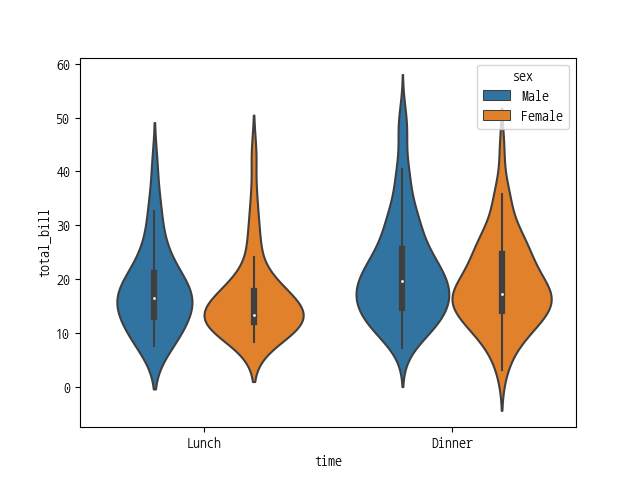

<IPython.core.display.Javascript object>


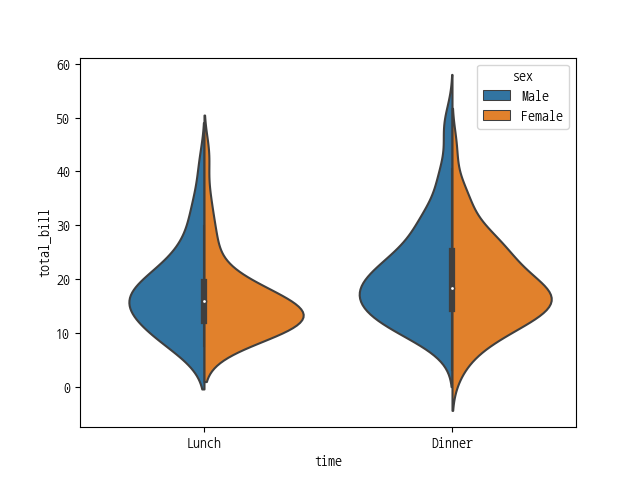

In [26]:
# seaborn 라이브러리로 바이올린 그래프 그리기 - 색상 추가
# 바이올린 그래프에 색상을 추가하는 방법은 violinplot() 메소드에 hue 속성에 색상으로 사용할 열 이름을 지정한다.
ax1 = plt.subplots()
ax1 = sns.violinplot(x = "time", y = "total_bill", hue = "sex", data = tips)
ax2 = plt.subplots()
ax2 = sns.violinplot(x = "time", y = "total_bill", hue = "sex", data = tips, split = True)

<IPython.core.display.Javascript object>


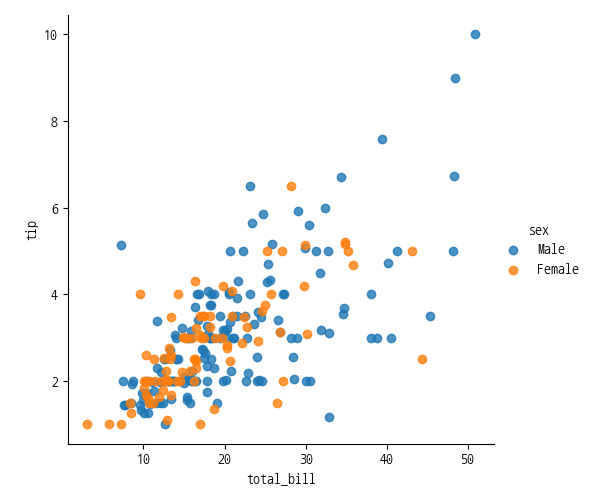

<IPython.core.display.Javascript object>


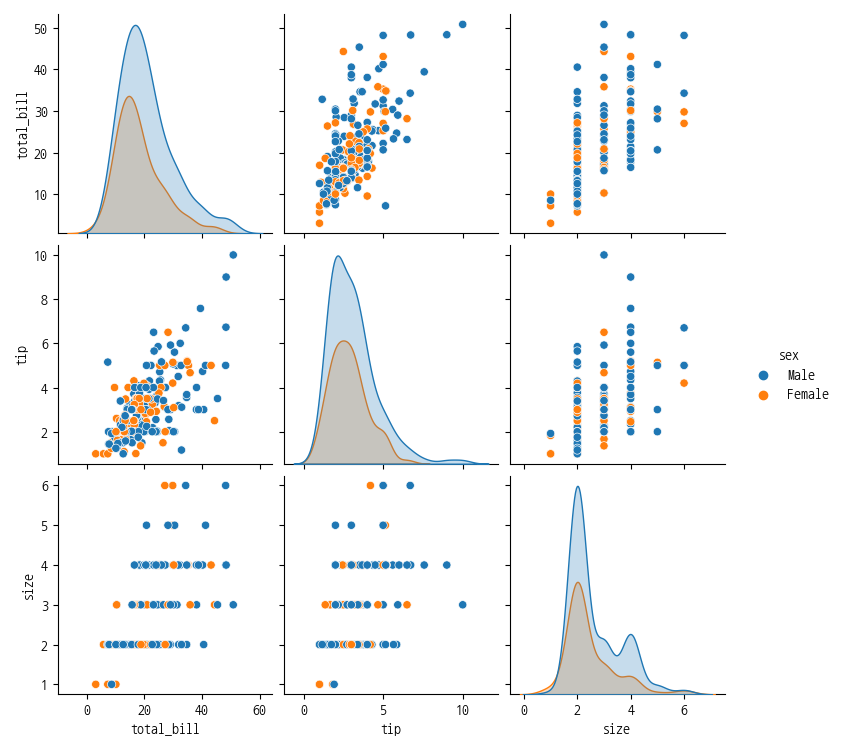

In [27]:
# 산점도, 관계 그래프 그리기 - 색상 추가
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", fit_reg = False)
sns.pairplot(tips, hue = "sex")

<IPython.core.display.Javascript object>


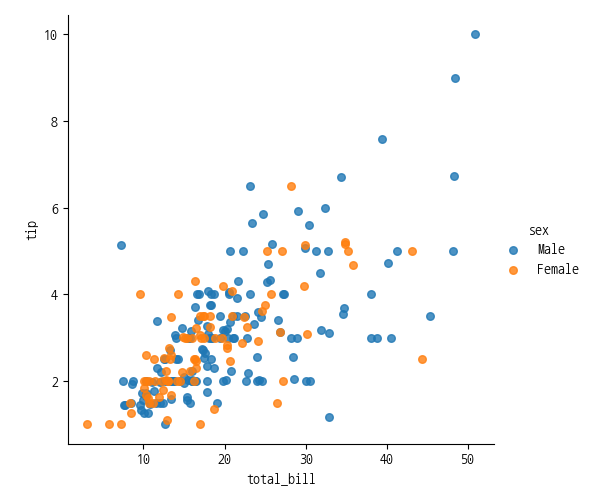

<IPython.core.display.Javascript object>


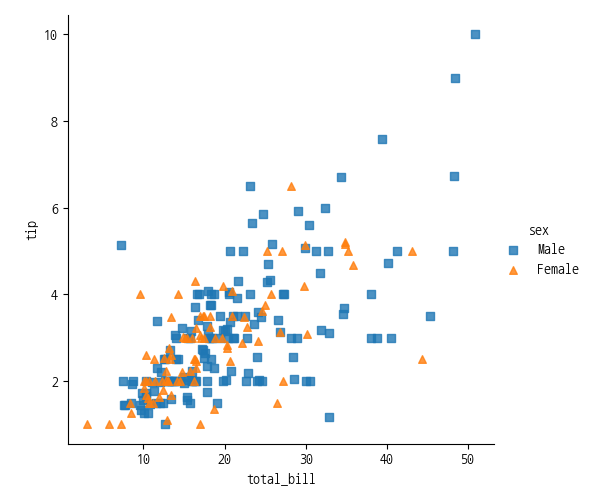

In [28]:
# 산점도 그래프의 크기와 모양 조절하기
# 산점도 그래프의 점 크기를 조정하려면 scatter_kws 속성에 딕셔너리 형태의 속성값을 전달하면 된다.
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", fit_reg = False, scatter_kws = {"s": 30})
# 산점도 그래프의 점에 다른 기호를 표시하고 싶다면 markers 속성에 표현하고자 하는 기호를 리스트에 담아서 전달하면 된다.
sns.lmplot(x = "total_bill", y = "tip", data = tips, hue = "sex", fit_reg = False, scatter_kws = {"s": 30}, markers = ["s", "^"])

<IPython.core.display.Javascript object>


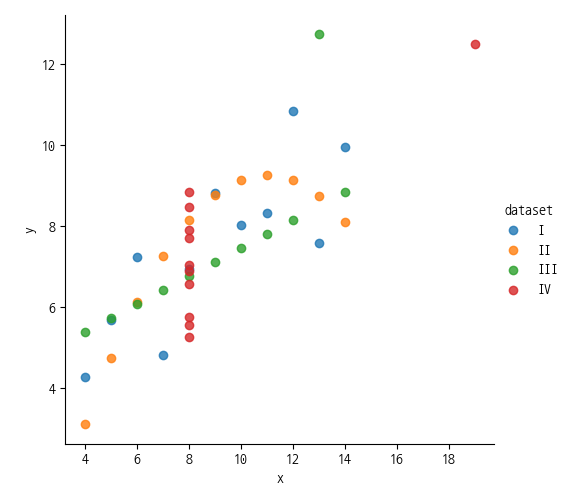

<IPython.core.display.Javascript object>


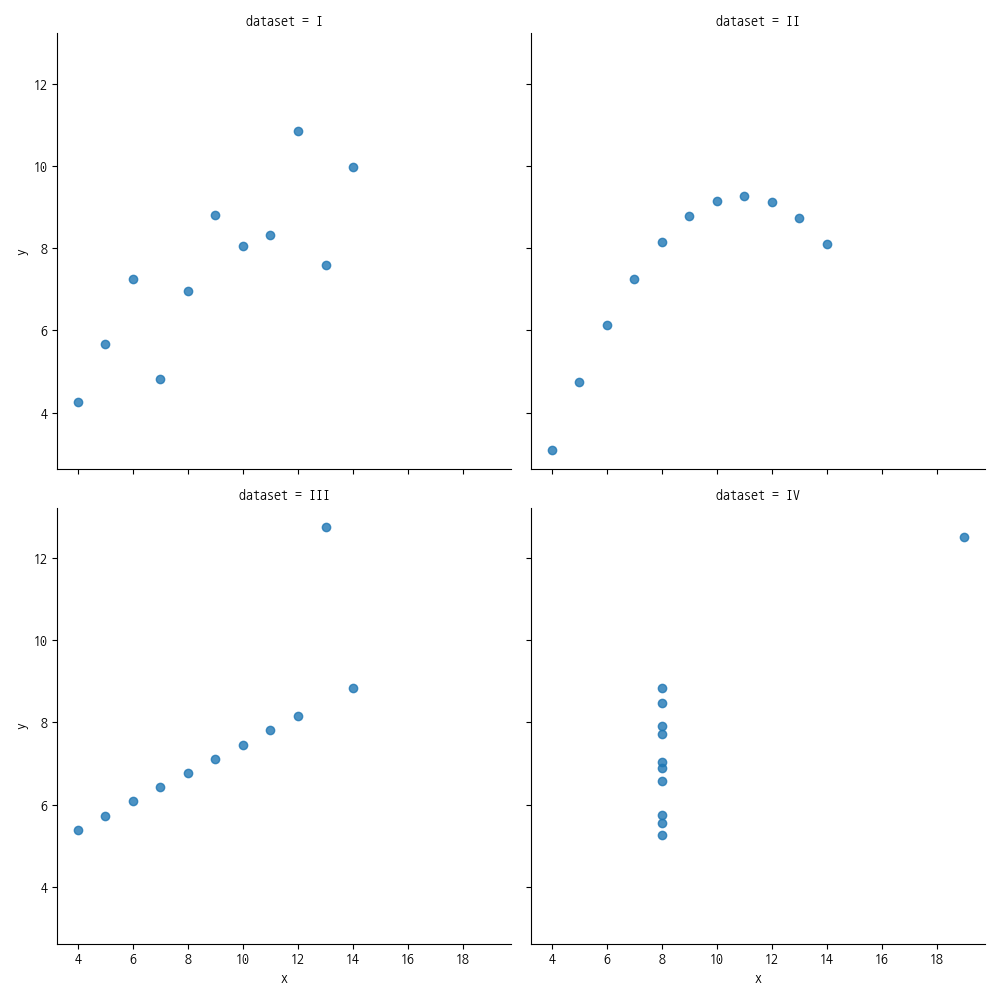

In [29]:
# lmplot() 메소드로 앤스콤 4분할 그래프 그린다.
# x, y 속성에 앤스콤 데이터 집합의 x, y 열을 전달하고 data 속성에는 anscombe 데이터프레임을 전달하고 fit_reg 속성에는 False 
# 속성을 지정해 회귀선을 표시하지 않는다. => 4개의 그룹이 한꺼번에 산점도로 그려진다.
sns.lmplot(x = "x", y = "y", data = anscombe, fit_reg = False, hue = "dataset")
# col 속성에 그룹 이름을 지정하고 col_wrap 속성에 열의 개수를 지정하면 4개의 그룹별로 산점도 그래프를 그릴 수 있다.
sns.lmplot(x = "x", y = "y", data = anscombe, fit_reg = False, col = "dataset", col_wrap = 2)

<IPython.core.display.Javascript object>


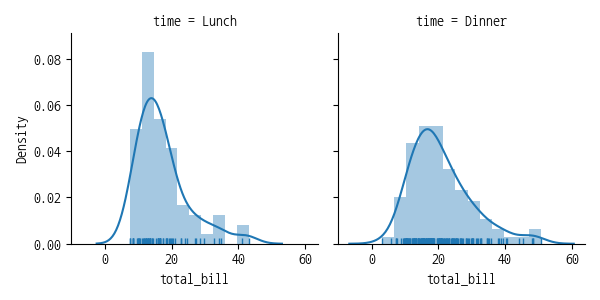

In [30]:
# FacetGrid 클래스를 사용해서 간편하게 그래프를 그릴 수 있다.
# FacetGrid 클래스로 차트를 구성할 데이터와 차트 작성의 기준이 되는 열을 넘겨 차트가 출력될 영역을 만든 후 map() 메소드를 
# 이용해서 차트 종류, 차트를 만들 데이터를 넘겨주면 된다.
facet = sns.FacetGrid(tips, col = "time")
facet = facet.map(sns.distplot, "total_bill", rug = True)

<IPython.core.display.Javascript object>


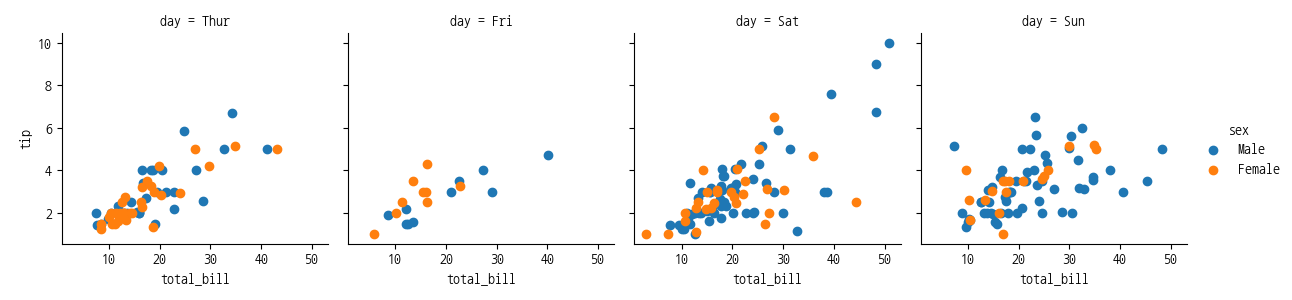

In [31]:
# day 열로 그룹을 구분해 산점도를 그리고 범례를 표시한다.
facet = sns.FacetGrid(tips, col = "day", hue = "sex")
facet = facet.map(plt.scatter, "total_bill", "tip")
facet = facet.add_legend() # 범례 추가, 색상으로 사용된 열이 범례로 추가된다.

<IPython.core.display.Javascript object>


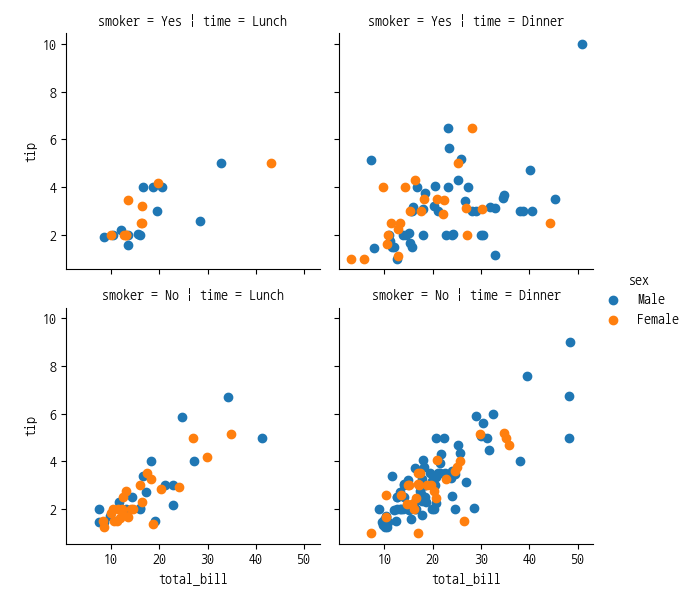

In [32]:
# time, smoker 열로 그룹을 구분해 산점도를 그린다.
# time 열은 Dinner/Lunch, smoker 열은 Yes/No 각각 2개의 값을 가지고 있으므로 2행 2열의 격자가 만들어지고 산점도가 출력된다.
facet = sns.FacetGrid(tips, col = "time", row = "smoker", hue = "sex")
facet = facet.map(plt.scatter, "total_bill", "tip")
facet = facet.add_legend()

데이터프레임과 시리즈로 그래프 그리기

<IPython.core.display.Javascript object>


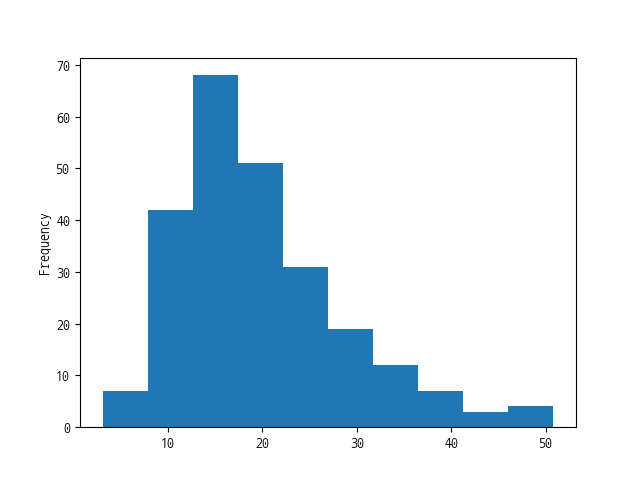

In [33]:
# hist() 메소드를 사용해 해당 시리즈의 값을 이용하여 히스토그램을 그릴 수 있다.
fig, ax = plt.subplots()
ax = tips["total_bill"].plot.hist()

<IPython.core.display.Javascript object>


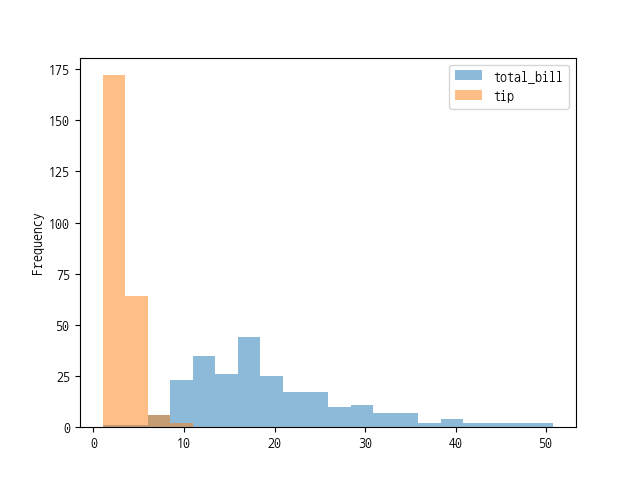

In [34]:
# 두 개 이상의 시리즈에 대한 히스토그램을 만들려면 시리즈를 리스트로 묶어서 전달하면 된다.
fig, ax = plt.subplots()
ax = tips[["total_bill", "tip"]].plot.hist(alpha = 0.5, bins = 20, ax = ax)

<IPython.core.display.Javascript object>


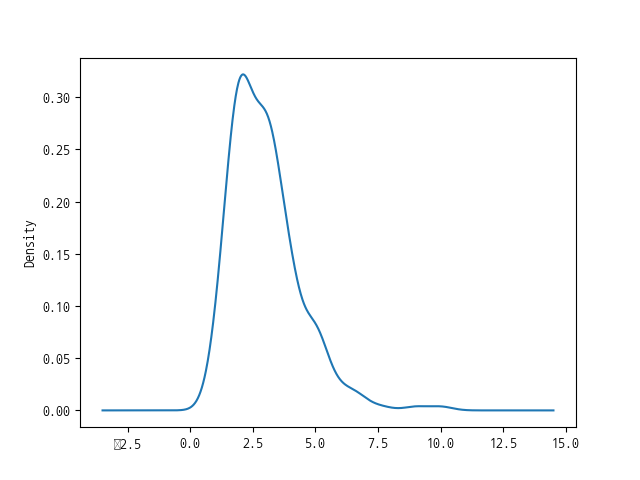

<IPython.core.display.Javascript object>


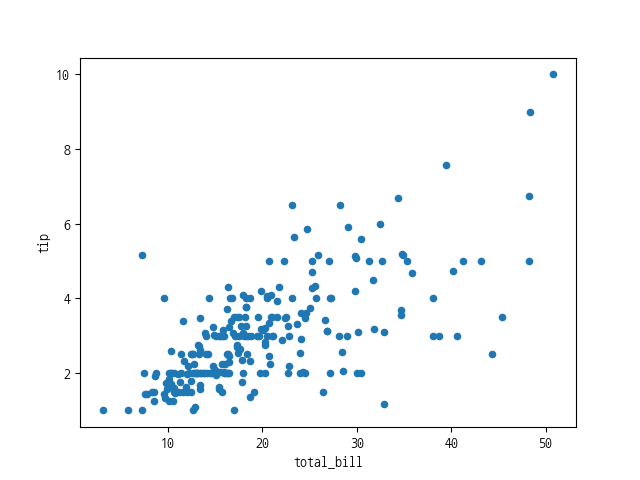

<IPython.core.display.Javascript object>


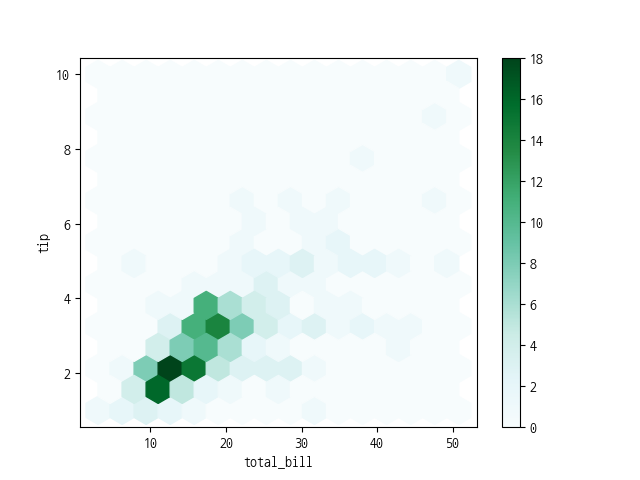

<IPython.core.display.Javascript object>


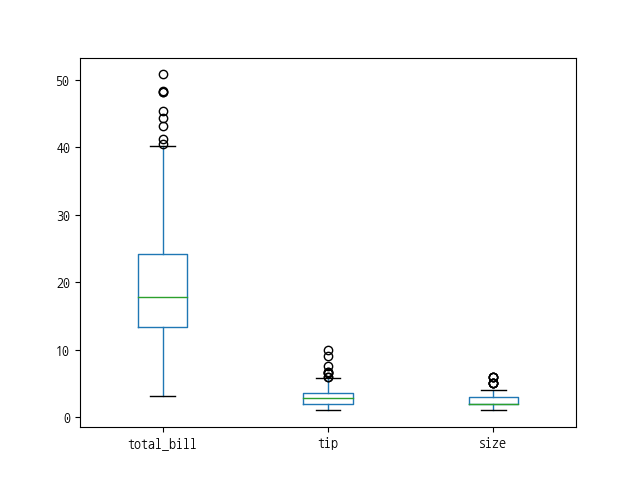

In [35]:
# 밀집도, 산점도, 육각 그래프, 박스 그래프는 각각 kde, scatter, hexbin. box 메소드를 사용해서 그릴 수 있다.
fig, ax = plt.subplots()
ax = tips["tip"].plot.kde()
ax = tips.plot.scatter(x = "total_bill", y = "tip")
ax = tips.plot.hexbin(x = "total_bill", y = "tip", gridsize = 15) # gridsize 옵션으로 육각형 크기를 조정한다.
ax = tips.plot.box()

seaborn 라이브러리로 그래프 스타일 지정하기

<IPython.core.display.Javascript object>


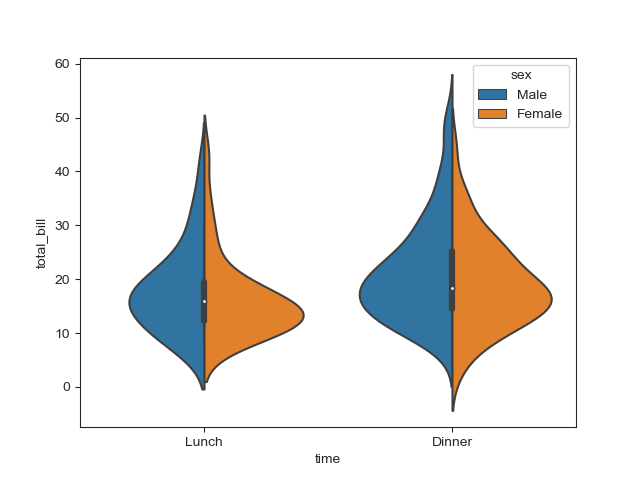

In [36]:
# seaborm 라이브러리 스타일은 darkgrid, whitegrid, dark, white, ticks로 5종류가 있다.
sns.set_style("ticks")
fig, ax = plt.subplots()
ax = sns.violinplot(x = "time", y = "total_bill", hue = "sex", data = tips, split = True)

<IPython.core.display.Javascript object>


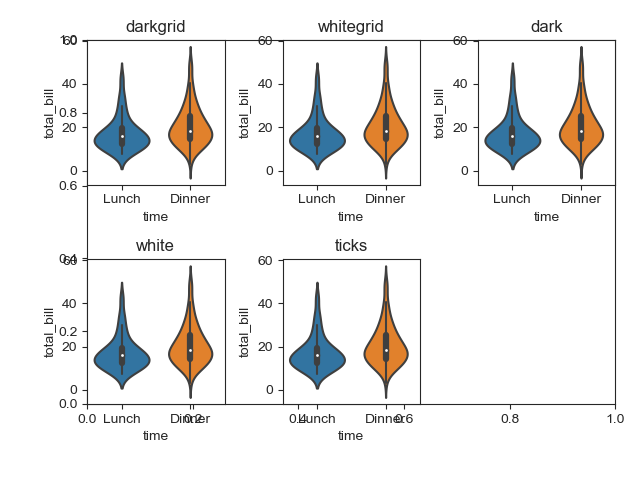

0 darkgrid
1 whitegrid
2 dark
3 white
4 ticks


In [37]:
fig, ax = plt.subplots()
seaborn_styles = ["darkgrid", "whitegrid", "dark", "white", "ticks"]
# enumerate()은 열거형을 의미하며 인수로 지정된 데이터의 (인덱스, 데이터)가 쌍으로 구성된 튜플을 리턴한다.
for idx, style in enumerate(seaborn_styles):
    print(idx, style)
    plot_position = idx + 1
    sns.axes_style(style)
    ax = fig.add_subplot(2, 3, plot_position)
    violin = sns.violinplot(x = "time", y = "total_bill", data = tips, ax = ax)
    violin.set_title(style)
fig.tight_layout()